# 🍷 Avaliação de Qualidade de Vinhos

## Objetivo

## 1. Preparação para Análise

### Importação de Blibliotecas

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Leitura de Dados

In [7]:
vinhos = pd.read_csv("winequality-red.csv")

In [8]:
# visualização básica dos dados
vinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# verificando quantidade de dados
vinhos.shape

(1599, 12)

Quase 1600 linhas e 12 colunas

## 2. Análise de Dados

### Informações básicas

Vamos verificar os tipos de dados de cada coluna agora

In [14]:
vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Ótimo! Todos os dados são numéricos e não nulos, facilitando as análises e visualização prática das distribuições e estatísticas.

Antes de seguir para o tratamento de dados, vamos verificar alguns dados importantes do dataset:

In [17]:
vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Algumas colunas apresentam valores bem discrepantes em relação a outras. Isso fica evidente ao observar o desvio padrão (`std`), que indica maior variação em certas variáveis, e ao comparar a média com a mediana, onde diferenças significativas sugerem distribuições assimétricas.

Esses sinais apontam para a possível necessidade de normalização dos dados, especialmente se forem usados em modelos de Machine Learning sensíveis à escala, como SVM ou KNN.

### Correlação entre variáveis

In [21]:
# Matriz de correlação
corr = vinhos.corr()

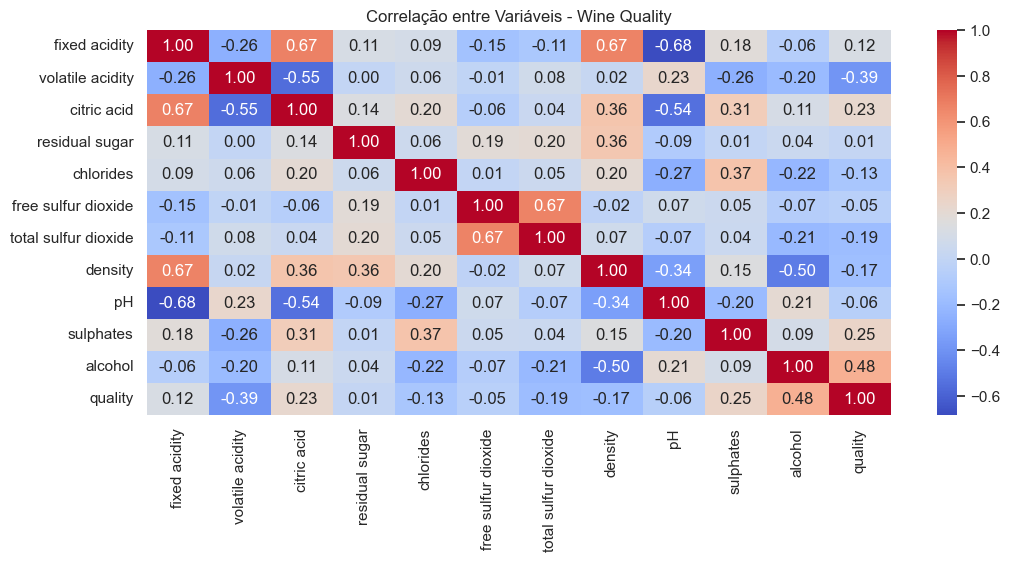

In [22]:
# Heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlação entre Variáveis - Wine Quality")
plt.show()

Ao examinar o heatmap, observamos algumas correlações relativamente altas entre variáveis, como entre acidez (`fixed acidity`) e densidade (`density`), com valores próximos de 0.67 e 0.68.

Embora o limite típico para forte correlação seja acima de 0.7, essas magnitudes justificam uma análise mais detalhada dessas variáveis, pois podem influenciar modelos de Machine Learning. Vamos prosseguir agora verificando a presença de dados duplicados no dataset.

### Dados Duplicados

In [26]:
vinhos.duplicated().sum()

240

Identificamos 240 registros duplicados no dataset de vinhos, que contém 1.599 amostras no total. Isso representa cerca de 15% dos dados (240/1599).

Embora a remoção de duplicatas seja comum em análises exploratórias para evitar viés, esse percentual é significativo. Considerando o contexto do dataset — medições físico-químicas de vinhos — duplicatas podem refletir amostras reais com valores idênticos, não necessariamente erros.

Porém, como não temos como comprovar se são diferentes vinhos com as mesmas medidas (já que não há uma tabela com nomes de vinhos pra verificar), vamos assumir que são erros e removê-las. Para o propósito deste EDA, essa decisão deve ser monitorada, avaliando seu impacto nos resultados.

### Outliers

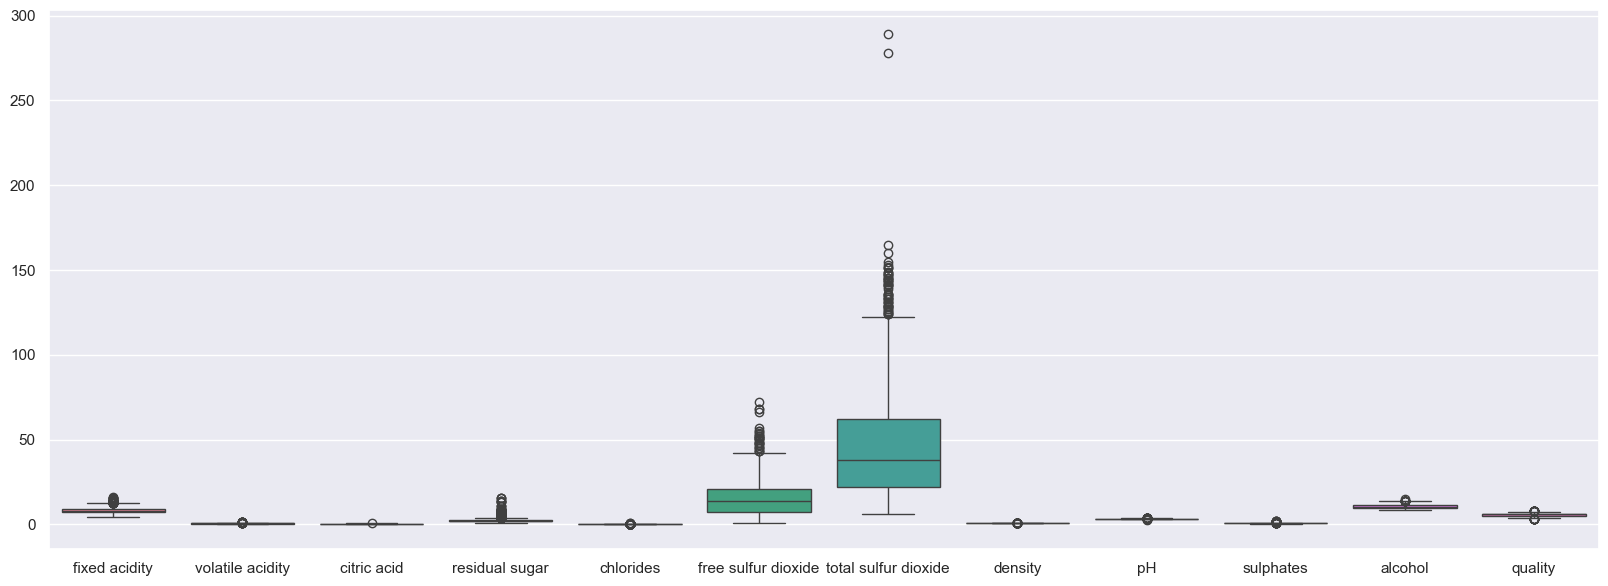

In [31]:
plt.figure(figsize = (20, 7))
sns.boxplot(data = vinhos)
plt.show()

Ao tentar visualizar os outliers com um boxplot de todas as variáveis, percebemos que as magnitudes muito discrepantes entre as colunas dificultam a leitura num único gráfico. 

Isso reflete as variações já notadas no `describe()`. Pra contornar isso, vamos normalizar os dados antes de visualizar.

In [34]:
# normalização utilizando z-score (StandardScaler)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# vamos manter uma nova variável com todas as alterações para verificar as mudanças feitas na prática
vinhos_alterado = pd.DataFrame(scaler.fit_transform(vinhos), columns=vinhos.columns)

Vamos verificar o resultado com `.head()`

In [36]:
vinhos_alterado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


Perfeito! Agora só visualizar o gráfico de caixa novamente:

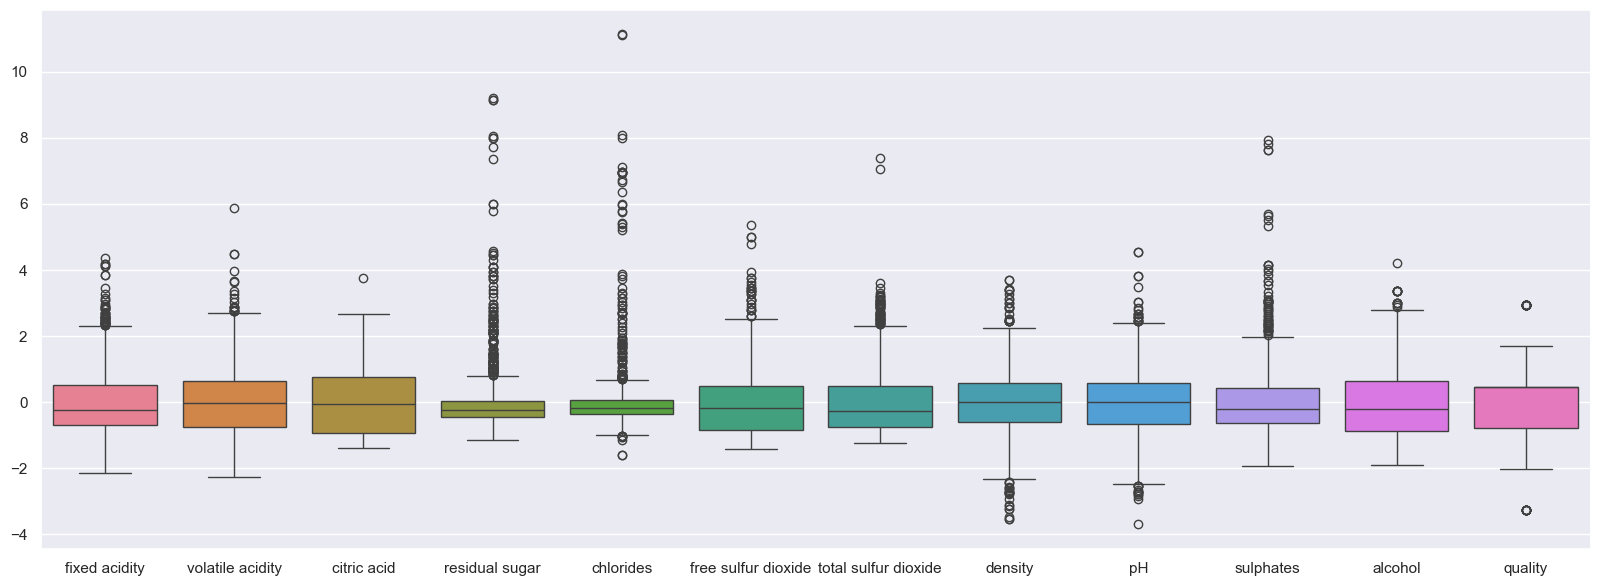

In [38]:
plt.figure(figsize = (20, 7))
sns.boxplot(data = vinhos_alterado)
plt.show()

Os dados revelam múltiplos outliers em várias variáveis independentes, como `residual sugar` e `chlorides`, indicando alta variabilidade — algo esperado em medições de vinhos.

Essa discrepância é típica do dataset, mas pode dificultar a identificação de padrões claros. Para aprimorar a análise e facilitar insights, optamos por aplicar uma transformação logarítmica nas variáveis.

In [41]:
vinhos_alterado = np.log1p(vinhos)

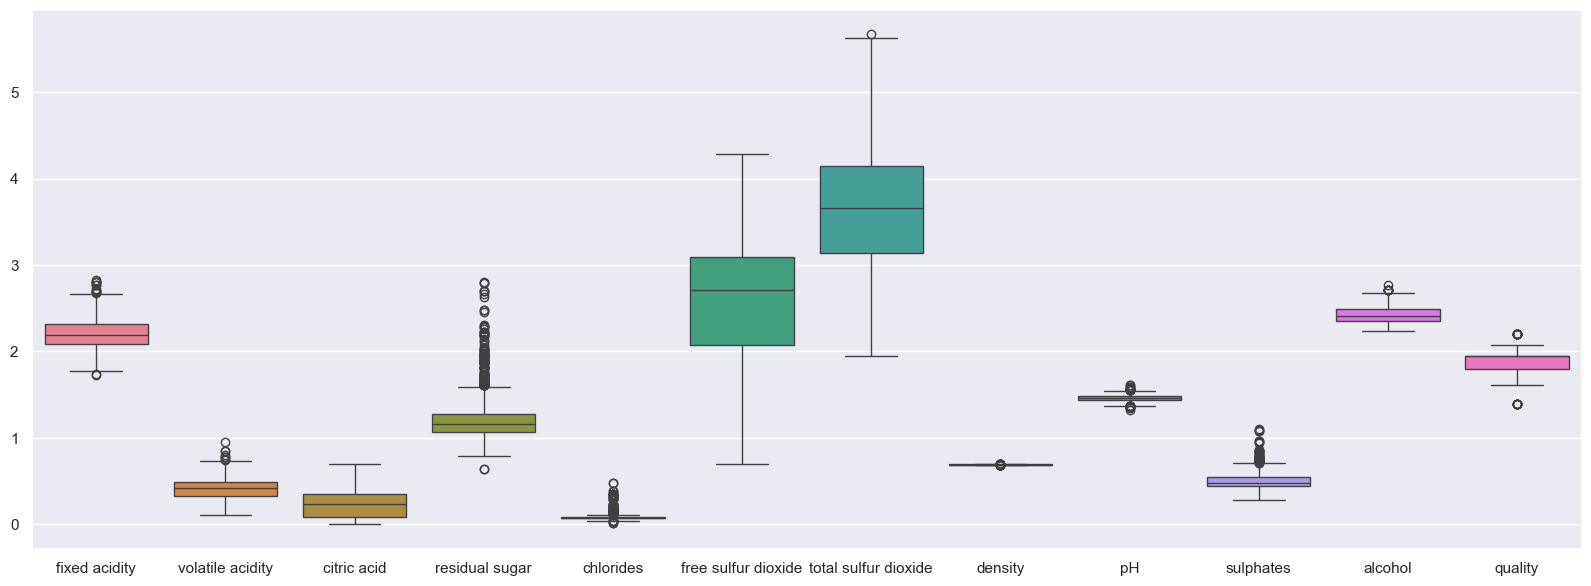

In [42]:
plt.figure(figsize = (20, 7))
sns.boxplot(data = vinhos_alterado)
plt.show()

Com a transformação logarítmica aplicada via `np.log1p()` em todo o dataset, conseguimos uma distribuição mais suave e adequada, reduzindo o impacto dos outliers e melhorando a visualização para análise.

Algumas variáveis, como `total sulfur dioxide`, naturalmente possuem muitos outliers como parte de suas características, e decidimos mantê-los assim. Para preservar a integridade da coluna `quality`, que é nosso alvo original, revertemos sua transformação, mantendo os valores brutos essenciais para futuros passos, como Machine Learning.

In [45]:
vinhos_alterado['quality'] = vinhos['quality']

## 3. Tratamento de Dados

Agora vamos seguir para o tratamento de dados separando em dois arquivos, dessa forma conseguiremos visualizar os impactos de nossas alterações em análises futuras e em possíveis insights.

Lembrando das informações e alterações feitas na seção anterior:

1. Correlação alta (mínimo 0.67) entre algumas variáveis.

2. 240 duplicatas (15% do total).

3. Outliers mantidos, valores normalizados com transformação logarítmica

### Correlação entre variáveis

Na análise exploratória, identificamos algumas correlações moderadas entre as variáveis independentes:  
- `fixed acidity` e `citric acid`: 0.67  
- `fixed acidity` e `density`: 0.67  
- `fixed acidity` e `pH`: -0.68  
- `free sulfur dioxide` e `total sulfur dioxide`: 0.67  

O tratamento de correlações é mais comum em Machine Learning, especialmente pra algoritmos sensíveis como SVM ou regressões lineares, onde multicolinearidade pode afetar o desempenho. Como nosso foco aqui é explorar os dados, optamos por apenas listar essas relações. Elas serão úteis pra guiar insights futuros e ajustes em etapas de modelagem, caso necessário.

### Dados duplicados

Agora, vamos remover os 240 dados duplicados identificados (15% do total) e salvar o resultado em `vinhos_alterado`.

Isso nos permitirá comparar os dados tratados com o dataset original posteriormente, avaliando o impacto dessa limpeza na análise e em futuros passos de Machine Learning.

In [58]:
vinhos_alterado.drop_duplicates(inplace = True)

In [59]:
# confirmando a remoção

vinhos_alterado.duplicated().sum()

0

Finalizamos o tratamento básico de dados em `vinhos_alterado`, removendo duplicatas e ajustando outliers com transformação logarítmica. Com isso, os dados estão preparados pra maximizar a geração de insights valiosos na próxima etapa.

Vamos agora explorar os padrões e tirar conclusões úteis pra análise exploratória.

## 4. Gerando Insights